# MLBD Precourse 
## Statistics in Python

In the MLBD MRes taught module "Statistical Methods for Experimental Physics
", we use python heavily. In this precourse material, we will introduce the basic tools in python that we use for statistics. Some of these are also covered in the "Scientific Python" precourse, but here we'll focus on statistics use cases.

The most common packages we'll need are `matplotlib`, `numpy` and `scipy`.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy

## Random variables

Random variables are a central concept in probability and statistics. We will only deal with two types of random variables, discrete and continuous. 

In python, we can use the `numpy.random` variable for generating random discrete and continuous variables. 

for *discrete* variables, we might have a set (or infinite set) of discrete outcomes for some event. For example, the event could be a dice roll, where the discrete outcomes are 1,2,3,4,5 or 6. We can randomly generate rolls using the `numpy.random.choice` method.

Each time you run the cell below, you will see a different random outcome and the probability for any outcome will be equal.  

In [2]:
dice_roll_outcomes = ['1','2','3','4','5','6']
random_roll = numpy.random.choice(dice_roll_outcomes)
print(random_roll)

2


We can also generate random *continuous* variables using python with the `numpy.random.uniform` method. By default, this will generate a random number  between  0 and 1, but we can also provide a minimum and maximum value to change that range. 

In [3]:
minimum=-1
maximum=3
random_continuous = numpy.random.uniform(minimum,maximum)
print(random_continuous)

0.7255363416571785


## Probability distributions

In the above cells, the probability that a particular outcome occurs is independent on that outcome. We also want to look at random variables that are distributed such that different outcomes have different probabilities  -- i.e we want to use probability distributions. 

the `scipy.stats` package has lots of different probability  distributions  we can access. Below are some examples of common probability distributions. We'll use the notation  that $x$ is our random variable and $f(x;\theta)$ is the probability distribution, where $\theta$ are the parameters of that distribution.  

Let's take for example the *Poisson*  distribution, which has one parameter $\lambda$. 

$$
f(x;\lambda) = \frac{\lambda^{x}}{x!}e^{-\lambda}
$$

The Poisson distribution is for discrete random variables and $x$ will be a random integer between 0 and +infinity. In scipy we can use the `stats.poisson` module. 

We can plot the distribution using  the `.pmf` (for discrete random variables) which stands for "probability mass function". Note that the `pmf` function has the calling pattern `.pmf(x,param1,param2,...)`.

Try changing the value of $\lambda$ (called `lamb`) to see how the distribution changes. 

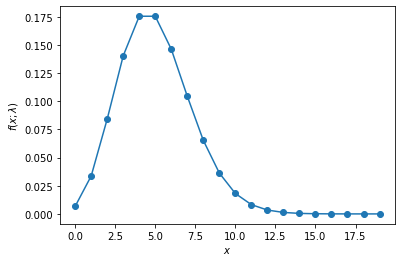

In [4]:
lamb = 5
x = range(0,20) 

plt.plot(x,stats.poisson.pmf(x,lamb),marker="o")
plt.xlabel("$x$")
plt.ylabel("$f(x;\lambda)$")
plt.show()

We can do the same thing for continuous random  variables. For example, the Gaussian distribution has two parameters $\mu$, and $\sigma$. In scipy, a Gaussian is called a *normal* distribution (`stats.norm`) 

In this case we need to use the `.pdf` function - which stands for "probability density function" to plot the distribution. 

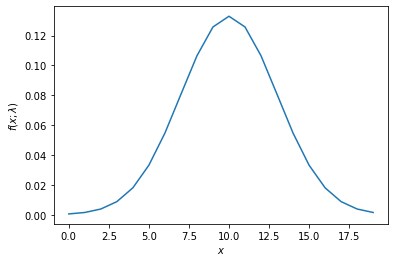

In [5]:
mu = 10
sigma = 3
x = range(0,20)

plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.xlabel("$x$")
plt.ylabel("$f(x;\lambda)$")
plt.show()

We  can use these modules to *generate* random variables that are distributed according to some probability distribution. For example, lets generate 100 discrete random variables that are distributed according to a Poisson distribution with parameter $\lambda=4$. We will use the `.rvs` method for it. 

Note that the calling pattern is `.rvs(param1,param2,...,size=n)`)

In [6]:
discrete_random = stats.poisson.rvs(4,size=100)
print(discrete_random)

[ 1  1  3  5  3  3  2  5  2  2  2  6  1  7  3  4  3  7  4  2  3  4  3  3
  4  6  3  5  5  6  3  3  5  1  4  5  5  3  4  4  3  8  4  5  6  6  6  3
  4  2  4  2  6  8  3  3  2  6  5  1  9  6  0  2  9  8  2  1  3  3  4  6
  2  1  2  3  4  5  1  1  1  4  4  4  4  4  6  6  3  5 10  3  6  2  6  7
  4  4  2  5]


We can plot these as a *histogram* to see how the random variables are distributed.

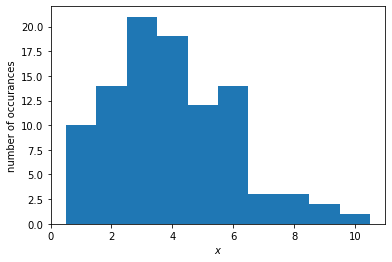

In [7]:
plt.hist(discrete_random,bins=10,range=(0.5,10.5))
plt.xlabel("$x$")
plt.ylabel("number of occurances")
plt.show()

Have a go at generating a Gaussian random variable. You can find a list of the probabillity distributions available in `scipy.stats` at https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html and https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

## Moments

We often want to calculate moments of distributions of samples of random variables. In python, we can do this very quickly using the `numpy` package. 

Let's calculate the mean and standard deviation for a sample of random numbers that are generated from a Gaussian distribution with parameters $\mu=0$,$\sigma=4$. 

In [8]:
random_variables = stats.norm.rvs(0,4,1000)

print("mean=",numpy.mean(random_variables))
print("standard deviation=",numpy.std(random_variables))

mean= -0.04492952312007042
standard deviation= 3.930015297641045


You will see that the mean is quite close to $\mu$ and  the standard deviation is close to $\sigma$. There is a good reason for this that you'll learn in your statistics lectures!